# Brain Stroke Prediction using Machine Learning

# Context

# Attribute Information

# Performing EDA-[Exploratory Data Analysis]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd()

'C:\\Users\\Piyush\\Downloads'

In [3]:
df=pd.read_csv('Stroke_prediction.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df1=df.copy()
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Initial Data Inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (5110, 12)


In [8]:
print("Columns:", df.columns.tolist())

Columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Handle Missing Values

In [10]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [11]:
df['bmi'].unique()


#here the bmi indicates the body mass index where it is the ratio of height and weight

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [12]:
#Drop ID column

In [13]:
df.drop(columns=["id"], inplace=True)

# REPLACING THE NAN VALUES WITH ITS MEDIAN IN bmi

In [14]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [15]:
df['bmi'].unique() #- Rplace sucessfull

array([36.6, 28.1, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 31.1, 21.7, 27. , 24.1,
       45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2, 29.4,
       24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1, 31.3,
       31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8, 21.8,
       27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2, 23.6,
       22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. , 42.5,
       35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. , 28.6,
       42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4, 40.5,
       36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. , 22. ,
       39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23.7, 24

# Data Types and Conversion

In [16]:
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cat_cols:
    df[col] = df[col].astype('category')




In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 265.4 KB


#  Statistical Summary

In [18]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for gender:
 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Value counts for ever_married:
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Value counts for work_type:
 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Value counts for Residence_type:
 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Value counts for smoking_status:
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [20]:
num_df = df.select_dtypes(include=['int64', 'float64'])

num_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [21]:
for i in num_df:
    print(f"\nValue counts for {i}:\n", df[i].value_counts())
    


Value counts for age:
 age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64

Value counts for hypertension:
 hypertension
0    4612
1     498
Name: count, dtype: int64

Value counts for heart_disease:
 heart_disease
0    4834
1     276
Name: count, dtype: int64

Value counts for avg_glucose_level:
 avg_glucose_level
93.88     6
73.00     5
72.49     5
91.85     5
91.68     5
         ..
61.98     1
91.01     1
120.03    1
138.51    1
118.41    1
Name: count, Length: 3979, dtype: int64

Value counts for bmi:
 bmi
28.1    230
28.7     41
28.4     38
27.7     37
26.1     37
       ... 
47.9      1
13.0      1
13.9      1
54.1      1
14.9      1
Name: count, Length: 418, dtype: int64

Value counts for stroke:
 stroke
0    4861
1     249
Name: count, dtype: int64


# Univariate Analysis

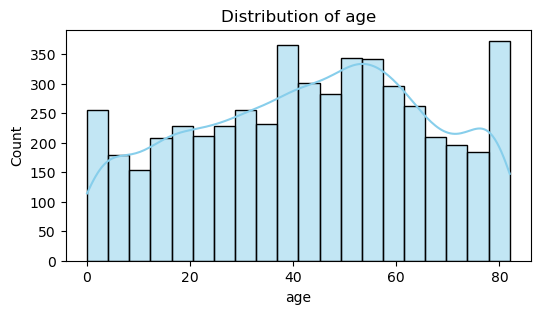

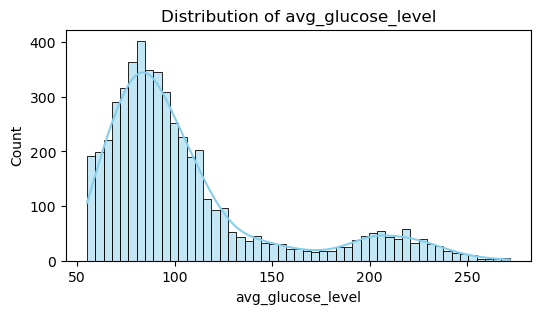

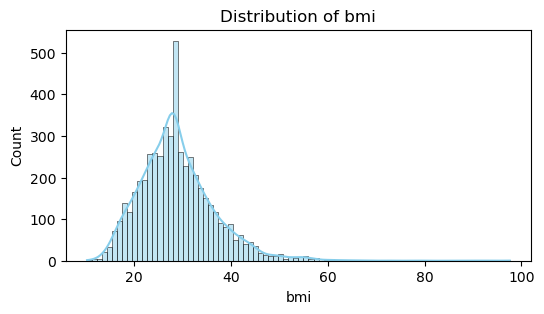

In [22]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


# Distribution of Target Variables

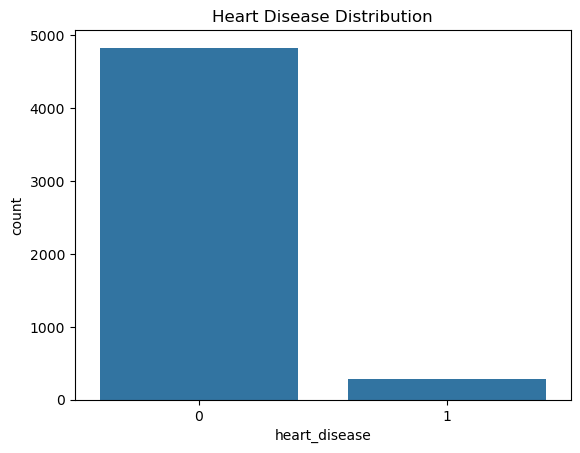

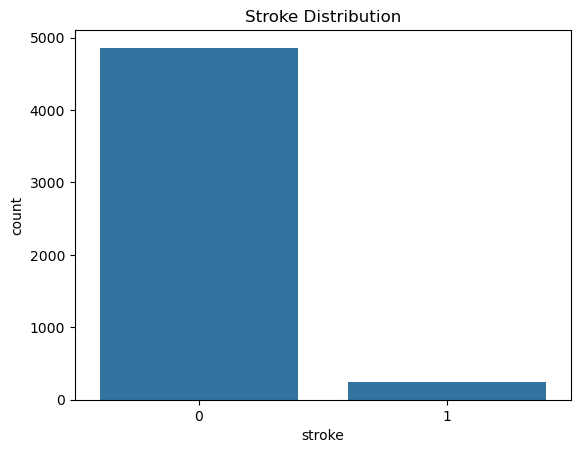

In [23]:
# Heart Disease
sns.countplot(x='heart_disease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

# Stroke
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution")
plt.show()


#  Bivariate Analysis

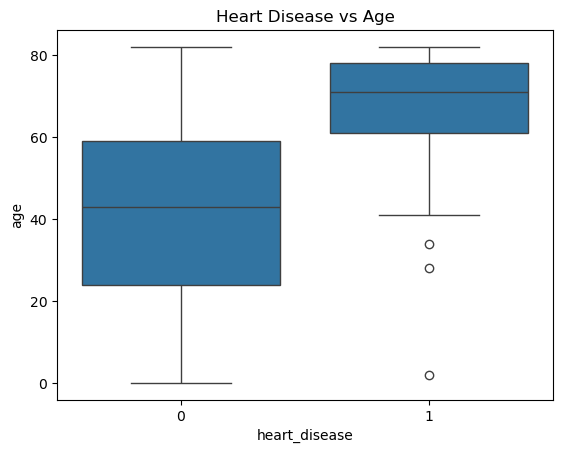

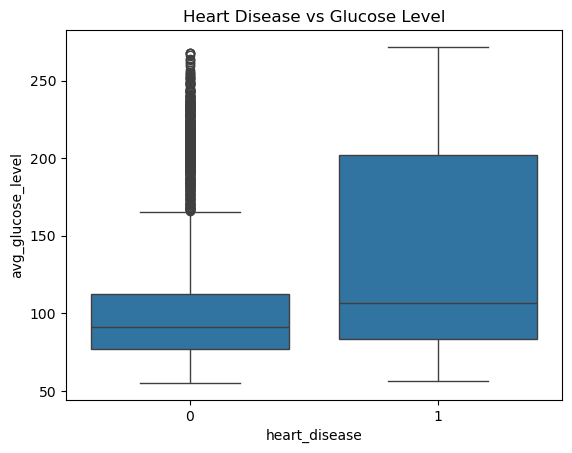

In [24]:
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title("Heart Disease vs Age")
plt.show()

sns.boxplot(x='heart_disease', y='avg_glucose_level', data=df)
plt.title("Heart Disease vs Glucose Level")
plt.show()


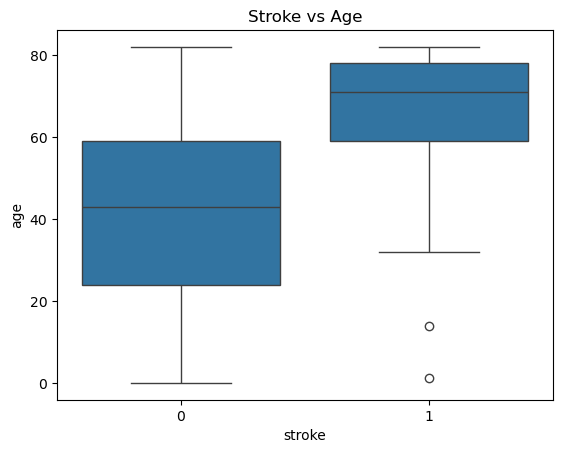

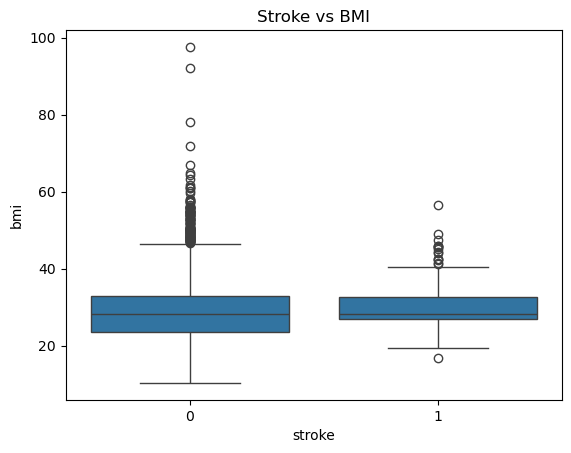

In [25]:
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Stroke vs Age")
plt.show()

sns.boxplot(x='stroke', y='bmi', data=df)
plt.title("Stroke vs BMI")
plt.show()

# smoking Status VS Stroke

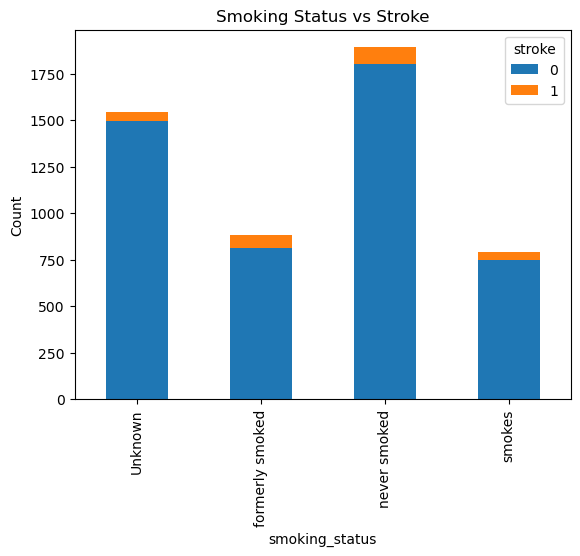

In [26]:
pd.crosstab(df['smoking_status'], df['stroke']).plot(kind='bar', stacked=True)
plt.title("Smoking Status vs Stroke")
plt.ylabel("Count")
plt.show()

# Correlation Matrix

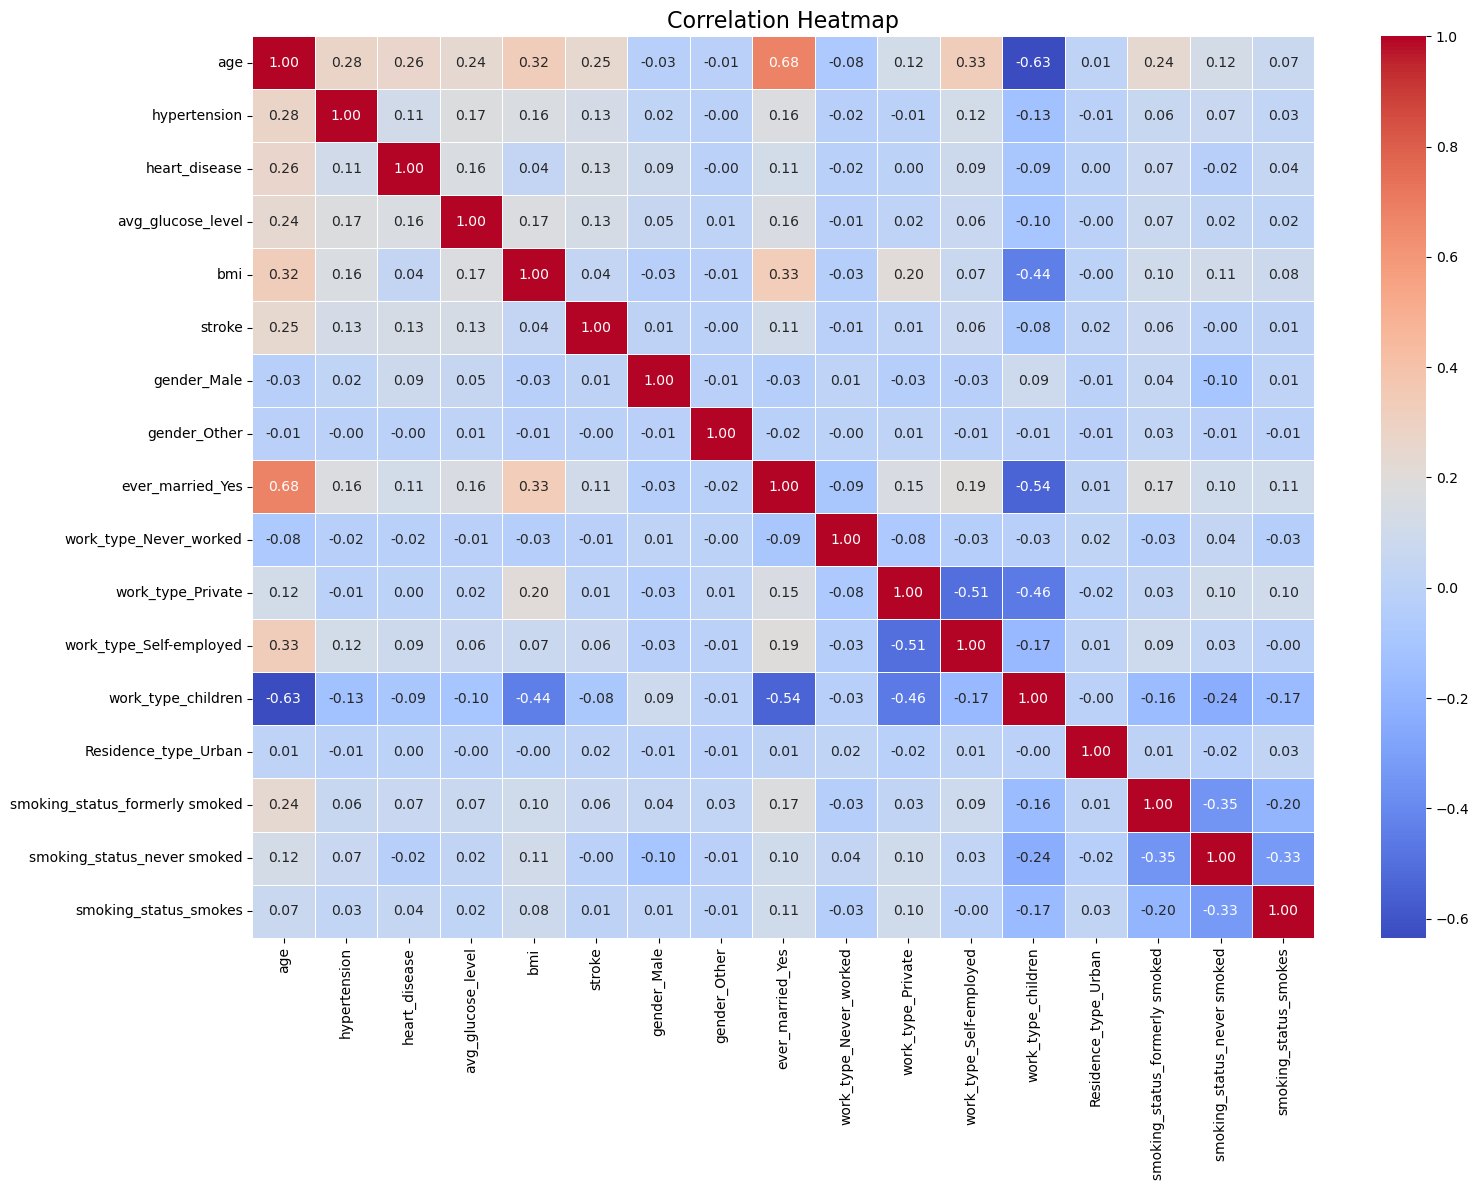

In [27]:
# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Plot heatmap
plt.figure(figsize=(16,12))  # Adjusted for better visibility
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()



# Check for Class Imbalance

In [28]:
# Heart disease imbalance
print("Heart Disease Class Count:")
print(df['heart_disease'].value_counts(normalize=True))

# Stroke imbalance
print("Stroke Class Count:")
print(df['stroke'].value_counts(normalize=True))


Heart Disease Class Count:
heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64
Stroke Class Count:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


# Final Cleaned Dataset Overview

In [29]:
print("Final dataset shape:", df.shape)
print("------------------------------------")
print("Final column types:\n", df.dtypes)
print("-------------------------------------")
print("Any missing values left?:", df.isnull().sum().sum())

Final dataset shape: (5110, 11)
------------------------------------
Final column types:
 gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object
-------------------------------------
Any missing values left?: 0


# Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
LE=LabelEncoder()

In [32]:
df_categorical=df.select_dtypes("category")
df_categorical

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [33]:
for i in df_categorical:
    df_categorical[i]=LE.fit_transform(df_categorical[i])
df_categorical

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
...,...,...,...,...,...
5105,0,1,2,1,2
5106,0,1,3,1,2
5107,0,1,3,0,2
5108,1,1,2,0,1


# Scaling

In [34]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [35]:
df_Numerical=df.select_dtypes(["int64","float64"])
df_Numerical       

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [37]:
SS=MinMaxScaler()

In [38]:
scaled_numerical_array=SS.fit_transform(df_Numerical)
scaled_numerical_array

array([[0.81689453, 0.        , 1.        , 0.80126489, 0.30126002,
        1.        ],
       [0.74365234, 0.        , 0.        , 0.67902317, 0.20389462,
        1.        ],
       [0.97558594, 0.        , 1.        , 0.23451205, 0.25429553,
        1.        ],
       ...,
       [0.42626953, 0.        , 0.        , 0.12865848, 0.2325315 ,
        0.        ],
       [0.62158203, 0.        , 0.        , 0.51320284, 0.17525773,
        0.        ],
       [0.53613281, 0.        , 0.        , 0.13922999, 0.18213058,
        0.        ]])

In [39]:
scaled_numerical_df=pd.DataFrame(scaled_numerical_array,columns=df_Numerical.columns)
scaled_numerical_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.816895,0.0,1.0,0.801265,0.301260,1.0
1,0.743652,0.0,0.0,0.679023,0.203895,1.0
2,0.975586,0.0,1.0,0.234512,0.254296,1.0
3,0.597168,0.0,0.0,0.536008,0.276060,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,1.0
...,...,...,...,...,...,...
5105,0.975586,1.0,0.0,0.132167,0.203895,0.0
5106,0.987793,0.0,0.0,0.323516,0.340206,0.0
5107,0.426270,0.0,0.0,0.128658,0.232532,0.0
5108,0.621582,0.0,0.0,0.513203,0.175258,0.0


In [40]:
df2=pd.concat((scaled_numerical_df,df_categorical),axis=1)
df2

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,0.816895,0.0,1.0,0.801265,0.301260,1.0,1,1,2,1,1
1,0.743652,0.0,0.0,0.679023,0.203895,1.0,0,1,3,0,2
2,0.975586,0.0,1.0,0.234512,0.254296,1.0,1,1,2,0,2
3,0.597168,0.0,0.0,0.536008,0.276060,1.0,0,1,2,1,3
4,0.963379,1.0,0.0,0.549349,0.156930,1.0,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1.0,0.0,0.132167,0.203895,0.0,0,1,2,1,2
5106,0.987793,0.0,0.0,0.323516,0.340206,0.0,0,1,3,1,2
5107,0.426270,0.0,0.0,0.128658,0.232532,0.0,0,1,3,0,2
5108,0.621582,0.0,0.0,0.513203,0.175258,0.0,1,1,2,0,1


# Skewness Removal

In [41]:
from scipy.stats import skew

In [42]:
df2.select_dtypes(["int64","float64"]).columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [43]:
for i in df2.select_dtypes(["int64","float64"]).columns:
    print(f"Skewness of {i} is {round(df2[i].skew(),2)}\n")
    

Skewness of age is -0.14

Skewness of hypertension is 2.72

Skewness of heart_disease is 3.95

Skewness of avg_glucose_level is 1.57

Skewness of bmi is 1.09

Skewness of stroke is 4.19

Skewness of gender is 0.35

Skewness of ever_married is -0.66

Skewness of work_type is -0.31

Skewness of Residence_type is -0.03

Skewness of smoking_status is -0.04



Skewness of age is -0.14



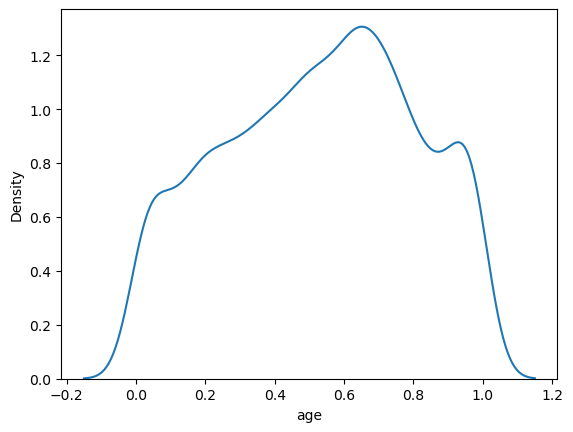

Skewness of hypertension is 2.72



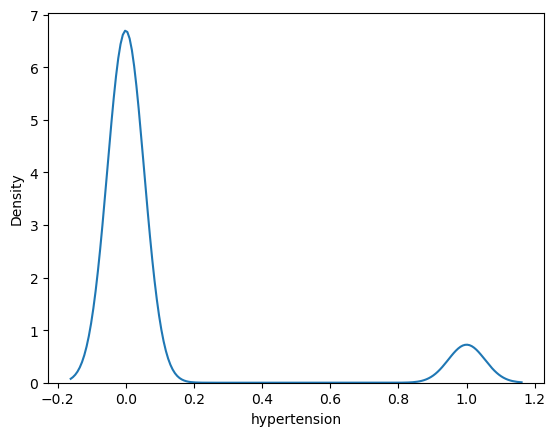

Skewness of heart_disease is 3.95



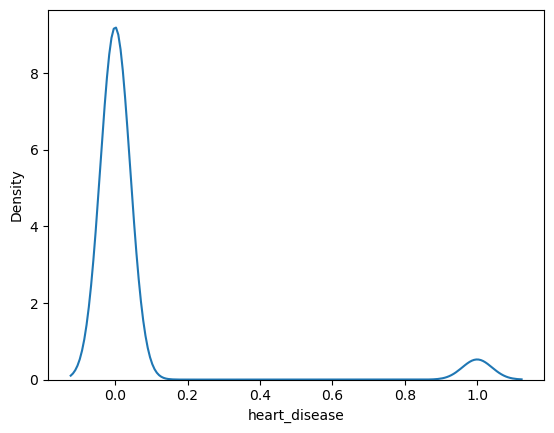

Skewness of avg_glucose_level is 1.57



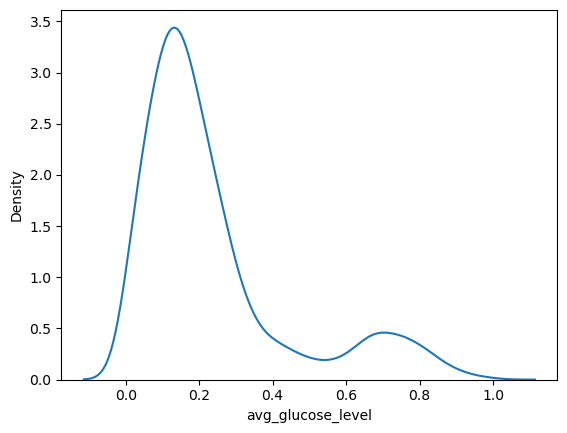

Skewness of bmi is 1.09



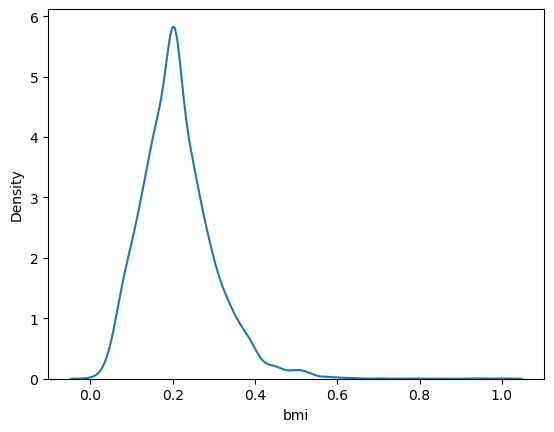

Skewness of stroke is 4.19



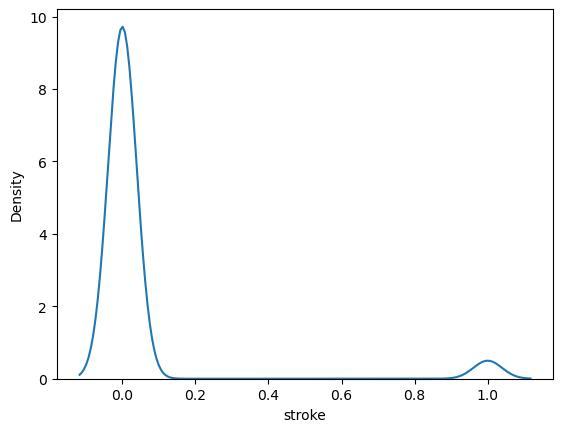

Skewness of gender is 0.35



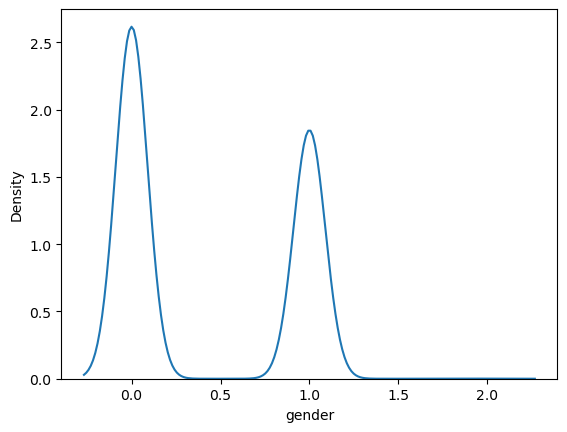

Skewness of ever_married is -0.66



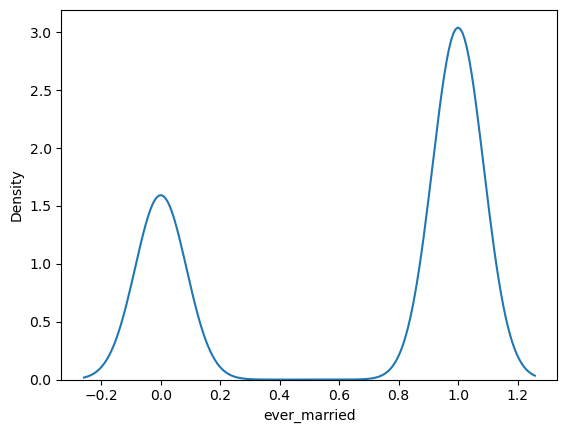

Skewness of work_type is -0.31



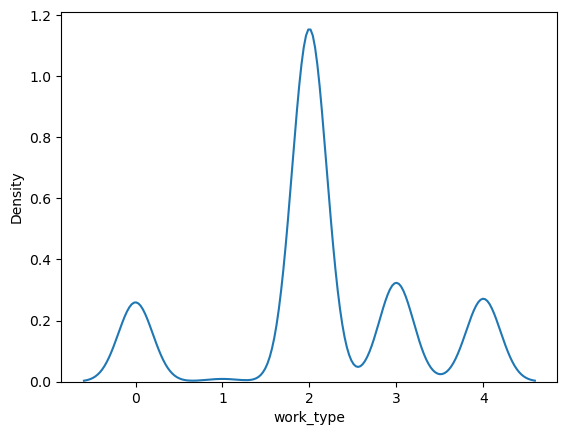

Skewness of Residence_type is -0.03



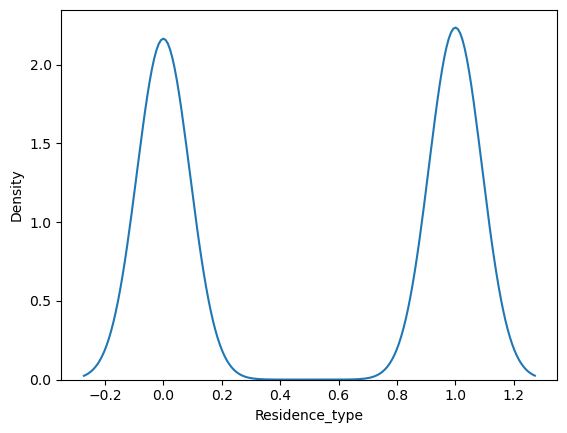

Skewness of smoking_status is -0.04



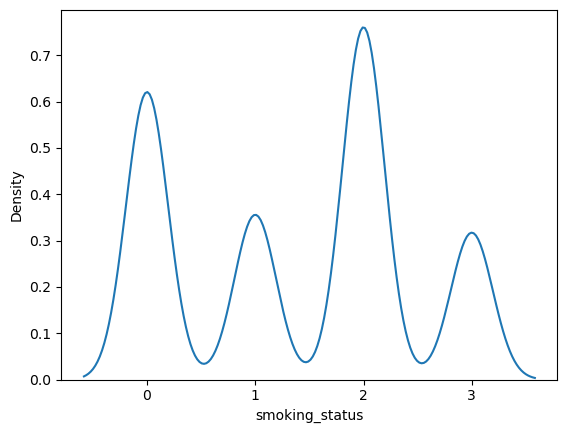

In [44]:
for i in df2.select_dtypes(["int64","float64"]).columns:
    print(f"Skewness of {i} is {round(df2[i].skew(),2)}\n")
    sns.kdeplot(df2[i])
    plt.show()

# For Brain Stroke Prediction

In [45]:
x=df2.drop('stroke', axis=1)
y=df2['stroke']

In [46]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,0.816895,0.0,1.0,0.801265,0.301260,1,1,2,1,1
1,0.743652,0.0,0.0,0.679023,0.203895,0,1,3,0,2
2,0.975586,0.0,1.0,0.234512,0.254296,1,1,2,0,2
3,0.597168,0.0,0.0,0.536008,0.276060,0,1,2,1,3
4,0.963379,1.0,0.0,0.549349,0.156930,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1.0,0.0,0.132167,0.203895,0,1,2,1,2
5106,0.987793,0.0,0.0,0.323516,0.340206,0,1,3,1,2
5107,0.426270,0.0,0.0,0.128658,0.232532,0,1,3,0,2
5108,0.621582,0.0,0.0,0.513203,0.175258,1,1,2,0,1


In [47]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, Length: 5110, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.15, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score,classification_report

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
LR=LogisticRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)

accuracy = accuracy_score(ytest, ypred) * 100
print(f" Stroke Prediction Accuracy: {accuracy:.2f}%")
print("\n Classification Report:\n")
print(classification_report(ytest, ypred))

 Stroke Prediction Accuracy: 93.87%

 Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       720
         1.0       0.00      0.00      0.00        47

    accuracy                           0.94       767
   macro avg       0.47      0.50      0.48       767
weighted avg       0.88      0.94      0.91       767



In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
ypred=DT.predict(xtest)

accuracy = accuracy_score(ytest, ypred) * 100
print(f" Stroke Prediction Accuracy: {accuracy:.2f}%")
print("\n Classification Report:\n")
print(classification_report(ytest, ypred))

 Stroke Prediction Accuracy: 91.00%

 Classification Report:

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       720
         1.0       0.19      0.15      0.17        47

    accuracy                           0.91       767
   macro avg       0.57      0.55      0.56       767
weighted avg       0.90      0.91      0.90       767



In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
KNN=KNeighborsClassifier()
KNN.fit(xtrain,ytrain)
ypred=KNN.predict(xtest)

accuracy = accuracy_score(ytest, ypred) * 100
print(f" Stroke Prediction Accuracy: {accuracy:.2f}%")
print("\n Classification Report:\n")
print(classification_report(ytest, ypred))   

 Stroke Prediction Accuracy: 93.87%

 Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       720
         1.0       0.50      0.02      0.04        47

    accuracy                           0.94       767
   macro avg       0.72      0.51      0.50       767
weighted avg       0.91      0.94      0.91       767



In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RF=RandomForestClassifier()
RF.fit(xtrain,ytrain)
ypred=RF.predict(xtest)

accuracy = accuracy_score(ytest, ypred) * 100
print(f" Stroke Prediction Accuracy: {accuracy:.2f}%")
print("\n Classification Report:\n")
print(classification_report(ytest, ypred))

 Stroke Prediction Accuracy: 93.87%

 Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       720
         1.0       0.00      0.00      0.00        47

    accuracy                           0.94       767
   macro avg       0.47      0.50      0.48       767
weighted avg       0.88      0.94      0.91       767



In [59]:
!pip install xgboost

In [60]:
from xgboost import XGBClassifier

XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGB.fit(xtrain, ytrain)
ypred = XGB.predict(xtest)

accuracy = accuracy_score(ytest, ypred) * 100
print(f"XGBoost Accuracy: {accuracy:.2f}%")
print("\n Classification Report:\n")
print(classification_report(ytest, ypred))


XGBoost Accuracy: 93.61%

 Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       720
         1.0       0.33      0.04      0.08        47

    accuracy                           0.94       767
   macro avg       0.64      0.52      0.52       767
weighted avg       0.90      0.94      0.91       767



In [61]:
rf_accuracy = 93.87
log_reg_accuracy = 93.87
knn_accuracy =93.74
DT_accuracy =89.83
xgb_accuracy = 93.48

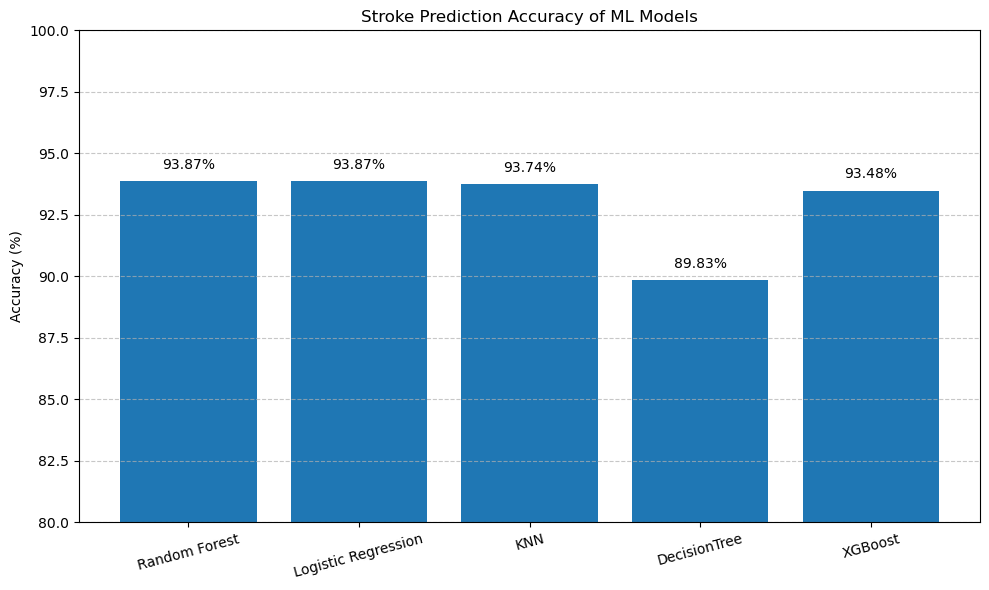

In [62]:
import matplotlib.pyplot as plt

# Accuracy values (in %)
model_names = ['Random Forest', 'Logistic Regression', 'KNN', 'DecisionTree', 'XGBoost']
accuracies = [rf_accuracy, log_reg_accuracy, knn_accuracy, DT_accuracy, xgb_accuracy]

# Plot
plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies)
plt.ylim(80, 100)
plt.ylabel('Accuracy (%)')
plt.title('Stroke Prediction Accuracy of ML Models')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy on top
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Make a predictive system

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("Stroke_prediction.csv")
df = df.drop(['id'], axis=1)
df['bmi'].fillna(df['bmi'].median(), inplace=True)

X = df.drop("stroke", axis=1)
y = df["stroke"]

cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Pipeline for encoding + model
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier())
])

# Train
model.fit(X, y)


import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [64]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [65]:
from sklearn.metrics import accuracy_score

ypred = model.predict(X)
print("Training Accuracy:", accuracy_score(y, ypred))



Training Accuracy: 1.0


In [66]:
def stroke_prediction_system(model):
    print("\n===== Stroke Prediction System =====\n")

    user = {}

    user["age"] = float(input("Age: "))
    user["hypertension"] = int(input("Hypertension (0/1): "))
    user["heart_disease"] = int(input("Heart Disease (0/1): "))
    user["avg_glucose_level"] = float(input("Average Glucose Level: "))
    user["bmi"] = float(input("BMI: "))

    user["gender"] = input("Gender (Male/Female/Other): ")
    user["ever_married"] = input("Ever Married (Yes/No): ")
    user["work_type"] = input("Work Type (Private/Self-employed/Govt_job/children/Never_worked): ")
    user["Residence_type"] = input("Residence (Urban/Rural): ")
    user["smoking_status"] = input("Smoking (formerly smoked/never smoked/smokes/Unknown): ")

    df_input = pd.DataFrame([user])

    prediction = model.predict(df_input)[0]

    print("\n===== RESULT =====")
    if prediction == 1:
        print("⚠️ HIGH RISK OF STROKE")
    else:
        print("✅ NO STROKE RISK DETECTED")
    print("=============================\n")


In [68]:
pip install Joblib


Note: you may need to restart the kernel to use updated packages.


In [67]:
stroke_prediction_system(model)



===== Stroke Prediction System =====



Age:  34
Hypertension (0/1):  1
Heart Disease (0/1):  1
Average Glucose Level:  34
BMI:  56
Gender (Male/Female/Other):  Male
Ever Married (Yes/No):  Yes
Work Type (Private/Self-employed/Govt_job/children/Never_worked):  Private
Residence (Urban/Rural):  Urban
Smoking (formerly smoked/never smoked/smokes/Unknown):  Unknown



===== RESULT =====
✅ NO STROKE RISK DETECTED

